In [13]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

输入数据为 $3*1$ 矩阵形式

In [14]:
x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[2.0], [4.0], [6.0]])

In [15]:
class LinearModel(torch.nn.Module):
  def __init__(self): # 初始化模型
    super(LinearModel, self).__init__() # 继承父类torch.nn.Module的初始化项
    self.linear = torch.nn.Linear(1, 1) # 初始化父类torch.nn.Linear(a, b) a表示数据输入维度，b表示输出维度
  def forward(self, x): # 定义前向传播（必须）
    y_pred = self.linear(x) # 调用linear模块中的前向传播函数
    return y_pred

model = LinearModel() # 实例化模型

In [16]:
criterion = torch.nn.MSELoss(size_average=False) # 定义损失函数
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # 定义优化器，model.parameters()会扫描module中的所有成员，如果成员中有相应权重，那么都会将结果加到要训练的参数集合上
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# optimizer = torch.optim.ASGD(model.parameters(), lr=0.01)
# optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01)
# optimizer = torch.optim.Adamax(model.parameters(), lr=0.01)

loss_list = []
epoch_list = []

/usr/local/lib/python3.9/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [17]:
for epoch in range(100):
  # 1.前向传播计算损失
  y_pred = model(x_data)
  loss = criterion(y_pred, y_data)

  epoch_list.append(epoch)
  loss_list.append(loss.item())
  # 梯度清零
  optimizer.zero_grad()
  # 2.反向传播
  loss.backward()
  # 3.更新参数
  optimizer.step()
  if epoch % 10 == 0:
    print('epoch=', epoch, 'w=', model.linear.weight.item(), 'b=', model.linear.bias.item())

x_test = torch.tensor([4.0])
y_test = model(x_test)

print("y_pred=", y_test.data)

epoch= 0 w= 0.8972098231315613 b= 0.05995325744152069
epoch= 10 w= 1.7973575592041016 b= 0.4178718030452728
epoch= 20 w= 1.825898289680481 b= 0.39502617716789246
epoch= 30 w= 1.8383060693740845 b= 0.3675553500652313
epoch= 40 w= 1.8496001958847046 b= 0.3418938219547272
epoch= 50 w= 1.8601014614105225 b= 0.318022221326828
epoch= 60 w= 1.8698694705963135 b= 0.2958172559738159
epoch= 70 w= 1.8789554834365845 b= 0.2751627266407013
epoch= 80 w= 1.8874070644378662 b= 0.25595027208328247
epoch= 90 w= 1.895268440246582 b= 0.23807935416698456
y_pred= tensor([7.8306])


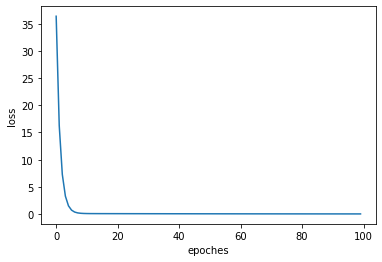

In [18]:
plt.plot(epoch_list, loss_list)
plt.xlabel('epoches')
plt.ylabel('loss')
plt.show()

### 拓展
1. `__init__()`作用是初始化类的实例
2. `__call__()`作用是使实例可以像函数一样被调用（同时不影响实例本身的生命周期）

参数`*args`代表把前面 n 个参数变成元组，`**kwargs`会把参数赋值变成字典

In [19]:
class iter:
	def __init__(self):
		pass
	def __call__(self, *args, **kwargs):
		pass

In [20]:
def func(*args, **kwargs):
 	print(args)
 	print(kwargs)

func(1,2,3,4,x=3,y=5)

(1, 2, 3, 4)
{'x': 3, 'y': 5}


Module实现了魔法函数__call__()，call()里面有一条语句是要调用forward()。因此新写的类中需要重写forward()覆盖掉父类中的forward()